In [11]:
from transformers import *

In [12]:
model = AlbertModel.from_pretrained("sanskrit_albert")

Some weights of the model checkpoint at sanskrit_albert were not used when initializing AlbertModel: ['predictions.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.decoder.weight', 'predictions.dense.bias', 'predictions.LayerNorm.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertModel were not initialized from the model checkpoint at sanskrit_albert and are newly initialized: ['albert.pooler.bias', 'albert.pooler.weight']
You should probably TRAIN this model on a down-stream task to be able to use it

In [13]:
model.eval()

AlbertModel(
  (embeddings): AlbertEmbeddings(
    (word_embeddings): Embedding(32001, 128, padding_idx=0)
    (position_embeddings): Embedding(514, 128)
    (token_type_embeddings): Embedding(1, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): AlbertTransformer(
    (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
    (albert_layer_groups): ModuleList(
      (0): AlbertLayerGroup(
        (albert_layers): ModuleList(
          (0): AlbertLayer(
            (full_layer_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (attention): AlbertAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (attention_dropout): Dropout(p=0.1, inplace=False)
  

In [14]:
atokenizer = AlbertTokenizer.from_pretrained("sanskrit_albert")


In [15]:
enc=atokenizer.encode("अपि स्वर्णमयी लङ्का न मे लक्ष्मण रोचते । जननी जन्मभूमिश्च स्वर्गादपि गरीयसी ॥")
enc2=atokenizer.encode(" द्वौ अतीव प्रसन्नौ अभवताम् ।")
print(atokenizer.decode(enc))

अपि स्वर्णमयी लङ्का न मे लक्ष्मण रोचते । जननी जन्मभूमिश्च स्वर्गादपि गरीयसी ॥


In [16]:
print(enc)
print(enc2)

[3, 39, 2070, 4713, 8248, 18, 107, 2055, 6128, 6, 5066, 333, 2903, 49, 901, 2834, 25275, 28, 4]
[3, 1265, 1096, 2849, 50, 11958, 6, 4]


In [17]:
import torch

In [18]:
ps = model(torch.tensor(enc).unsqueeze(1))
ps2 = model(torch.tensor(enc2).unsqueeze(1))

In [19]:
ps

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0702, -1.5161]],

        [[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0702, -1.5161]],

        [[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0702, -1.5161]],

        ...,

        [[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0701, -1.5161]],

        [[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0702, -1.5161]],

        [[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0702, -1.5161]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        ...,
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [ 0.7510,  0.3847, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123]],
       grad

In [20]:
ps2

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0702, -1.5161]],

        [[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0702, -1.5161]],

        [[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0702, -1.5161]],

        ...,

        [[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0702, -1.5161]],

        [[-1.1248,  1.7202,  0.9506,  ..., -0.2347,  0.5366,  0.6486]],

        [[ 0.1369, -1.6668, -0.2787,  ...,  0.4544, -0.0702, -1.5161]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [ 0.7510,  0.3847, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        ...,
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [-0.8425, -0.0736,  0.6226,  ...,  0.7039,  0.5283,  0.5680],
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123]],
       grad

In [21]:
print(ps[0].shape,ps[1].shape)

torch.Size([19, 1, 768]) torch.Size([19, 768])


In [22]:
print(ps2[1].shape)

torch.Size([8, 768])


In [23]:
model_path = "sanskrit_albert"
do_lower_case = True
config = AlbertConfig.from_pretrained(model_path)
tokenizer = AlbertTokenizer.from_pretrained(model_path, do_lower_case=do_lower_case)
model = AlbertModel.from_pretrained(model_path, config=config)

def convert_sentence(list_sentence):
    list_tokens = [tokenizer.encode(i) for i in list_sentence]
    length_list = [len(i) for i in list_tokens]
    max_length = max(length_list)

    # pad the sequence
    pad_id = tokenizer.pad_token_id
    pad_tokens = [i + [pad_id] * (max_length - len(i)) for i in list_tokens]
    atten_mask = [[1] * len(i) + [pad_id] * (max_length - len(i)) for i in list_tokens]
    model.eval()
    with torch.no_grad():
        pad_tokens = torch.tensor(pad_tokens)
        atten_mask = torch.tensor(atten_mask)
        hiddens = model(input_ids=pad_tokens, attention_mask=atten_mask)[0]

        hiddens = hiddens.numpy().tolist()
        hiddens = [i[:length] for i, length in zip(hiddens, length_list)]
    return hiddens

if __name__ == '__main__':
    document = [[" द्वौ अतीव प्रसन्नौ अभवताम् ।"]]
    print(convert_sentence(document))

Some weights of the model checkpoint at sanskrit_albert were not used when initializing AlbertModel: ['predictions.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.decoder.weight', 'predictions.dense.bias', 'predictions.LayerNorm.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertModel were not initialized from the model checkpoint at sanskrit_albert and are newly initialized: ['albert.pooler.bias', 'albert.pooler.weight']
You should probably TRAIN this model on a down-stream task to be able to use it

[[[0.13691335916519165, -1.6668128967285156, -0.27872392535209656, 2.276461362838745, -0.28753817081451416, 0.09972795099020004, 0.7382257580757141, -0.7600046396255493, -0.9459891319274902, -0.007409568876028061, -0.5805163383483887, -0.21273891627788544, 0.6384996175765991, 0.07555701583623886, 0.689960241317749, -0.5285146236419678, 1.5270476341247559, 0.20182277262210846, 2.422985792160034, -0.15017195045948029, -0.42096367478370667, -1.9181286096572876, -1.1830096244812012, -0.10178396850824356, 0.8091995716094971, 0.6285145878791809, 0.6389944553375244, 0.108986496925354, 0.621632993221283, -0.6785047650337219, -0.5144835710525513, 1.9257395267486572, 0.8857930898666382, -0.28606125712394714, -0.403703898191452, -0.7600532174110413, 0.45337310433387756, -0.3806563913822174, 0.008125154301524162, 1.0240815877914429, 0.173728346824646, 0.5473562479019165, -1.3157051801681519, 0.24391743540763855, 1.2069575786590576, 3.2399778366088867, 0.17303526401519775, -0.3724048435688019, -0.6

In [24]:
import numpy as np

In [25]:
document="अपि स्वर्णमयी लङ्का न मे लक्ष्मण रोचते । जननी जन्मभूमिश्च स्वर्गादपि गरीयसी"

In [26]:
2304/768

3.0

In [27]:
print(ps[1].shape,"\n",ps[1])

torch.Size([19, 768]) 
 tensor([[ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        ...,
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [ 0.7510,  0.3847, -0.4429,  ..., -0.7029, -0.0471, -0.3123],
        [ 0.7510,  0.3848, -0.4429,  ..., -0.7029, -0.0471, -0.3123]],
       grad_fn=<TanhBackward0>)


In [28]:
token_embeddings = torch.squeeze(ps[1], dim=1)

In [29]:
token_embeddings.shape

torch.Size([19, 768])

In [30]:
import matplotlib.pyplot as plt

In [31]:
np_arr = token_embeddings.cpu().detach().numpy()

In [32]:
a=np_arr.mean(axis=0).reshape(768,1)

In [33]:
a

array([[ 0.5832437 ],
       [ 0.33651865],
       [-0.3307387 ],
       [-0.38989723],
       [ 0.11560543],
       [ 0.24690364],
       [ 0.22008786],
       [-0.12182047],
       [-0.4207877 ],
       [ 0.11179119],
       [ 0.11441403],
       [ 0.33675843],
       [-0.27462345],
       [-0.10344254],
       [-0.32968146],
       [ 0.30666035],
       [-0.72229964],
       [-0.4293    ],
       [-0.7144934 ],
       [-0.1486309 ],
       [ 0.14379291],
       [ 0.05625176],
       [ 0.37648794],
       [ 0.6066906 ],
       [-0.17244034],
       [ 0.17908601],
       [ 0.25088108],
       [ 0.42410174],
       [-0.07628925],
       [ 0.48547804],
       [-0.05756253],
       [ 0.40302935],
       [ 0.34613425],
       [ 0.08855762],
       [-0.26690856],
       [-0.51999134],
       [-0.04350774],
       [-0.25649667],
       [ 0.12540354],
       [ 0.69103855],
       [ 0.01331612],
       [ 0.04766335],
       [ 0.25883323],
       [ 0.40024412],
       [-0.05733021],
       [ 0

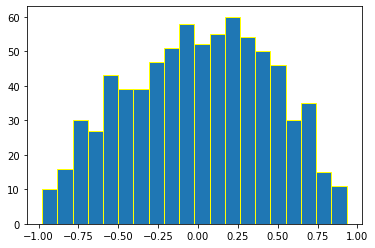

<Figure size 720x720 with 0 Axes>

In [34]:
plt.hist(np.array(np_arr[1]),bins=20,edgecolor='yellow')
plt.figure(figsize=(10,10))
plt.show()

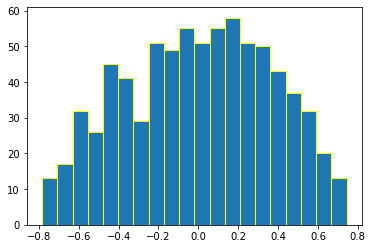

<Figure size 720x720 with 0 Axes>

In [35]:
plt.hist(a,bins=20,edgecolor='yellow')
plt.figure(figsize=(10,10))
plt.show()

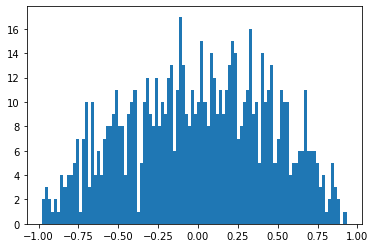

<Figure size 720x720 with 0 Axes>

In [36]:
plt.hist(np.array(np_arr[12]),bins=100)
plt.figure(figsize=(10,10))
plt.show()

In [37]:
sentence_embedding = torch.mean(ps[1], dim=0)

In [38]:
sentence_embedding.shape

torch.Size([768])

In [39]:
s=sentence_embedding.cpu().detach().numpy()

In [40]:
s=s.reshape(768,1)

In [41]:
s

array([[ 0.5832437 ],
       [ 0.33651862],
       [-0.3307387 ],
       [-0.38989726],
       [ 0.11560543],
       [ 0.24690367],
       [ 0.22008789],
       [-0.12182046],
       [-0.4207877 ],
       [ 0.11179119],
       [ 0.11441403],
       [ 0.3367584 ],
       [-0.27462348],
       [-0.10344254],
       [-0.32968146],
       [ 0.30666035],
       [-0.72229964],
       [-0.4293    ],
       [-0.7144934 ],
       [-0.14863089],
       [ 0.14379293],
       [ 0.05625176],
       [ 0.37648794],
       [ 0.6066906 ],
       [-0.17244034],
       [ 0.17908603],
       [ 0.25088108],
       [ 0.42410174],
       [-0.07628925],
       [ 0.48547804],
       [-0.05756253],
       [ 0.40302935],
       [ 0.34613425],
       [ 0.08855762],
       [-0.26690856],
       [-0.5199914 ],
       [-0.04350773],
       [-0.25649667],
       [ 0.12540352],
       [ 0.69103855],
       [ 0.01331612],
       [ 0.04766335],
       [ 0.25883323],
       [ 0.40024412],
       [-0.05733021],
       [ 0

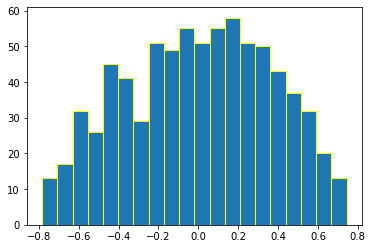

In [42]:
plt.hist(s,bins=20,edgecolor='yellow')
plt.show()

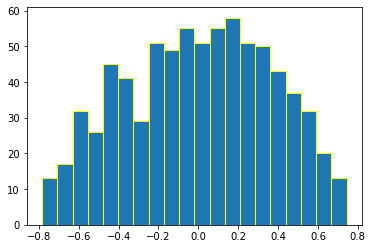

<Figure size 720x720 with 0 Axes>

In [43]:
plt.hist(a,bins=20,edgecolor='yellow')
plt.figure(figsize=(10,10))
plt.show()

In [44]:
cos=torch.nn.CosineSimilarity(dim=1)

In [45]:
cos(token_embeddings[0],token_embeddings[1])

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [46]:
from numpy import dot
from numpy.linalg import norm



In [47]:
cos_sim = dot(a, s)/(norm(a)*norm(s))

ValueError: shapes (768,1) and (768,1) not aligned: 1 (dim 1) != 768 (dim 0)

In [48]:
a=a.reshape(768,1)

In [49]:
s=s.reshape(768,1)

In [50]:
s.shape

(768, 1)

In [51]:
cos_sim

NameError: name 'cos_sim' is not defined

In [52]:
q=ps[1][6].cpu().detach().numpy()

In [53]:
q=q.reshape(768)

In [54]:
q.shape

(768,)

In [55]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
X = np.random.randn(10, 4)
km = KMeans(n_clusters=2).fit(X)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
print(closest)


[8 4]


In [56]:
X.shape

(10, 4)